Importation of libraries and dataset

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv('mpg_dataset (2).csv')
data.head()

,manufacturer,model,displacement,year,cylinder,transmission,drive,city_mpg,highway_mpg,fuel_type,class
0,audi,a4,1.8,1999,4,auto(l5),front,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),front,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),front,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),front,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),front,16,26,p,compact


What is the size and structure of our dataset?  

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
manufacturer    234 non-null object
model           234 non-null object
displacement    234 non-null float64
year            234 non-null int64
cylinder        234 non-null int64
transmission    234 non-null object
drive           234 non-null object
city_mpg        234 non-null int64
highway_mpg     234 non-null int64
fuel_type       234 non-null object
class           234 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


Dataset is made up of 3 dtypes with what looks like no null values. Let's make sure.

In [4]:
data.isnull().sum()

manufacturer    0
model           0
displacement    0
year            0
cylinder        0
transmission    0
drive           0
city_mpg        0
highway_mpg     0
fuel_type       0
class           0
dtype: int64

We can get a closer look at the distribution of the data by seperating it by manufacturer

In [5]:
manu = set(data['manufacturer'])

In [6]:
manu

{'audi',
 'chevrolet',
 'dodge',
 'ford',
 'honda',
 'hyundai',
 'jeep',
 'land rover',
 'lincoln',
 'mercury',
 'nissan',
 'pontiac',
 'subaru',
 'toyota',
 'volkswagen'}

In [7]:
for m in manu:
    print'----------------',m.upper(),'---------------------'
    print(data[data['manufacturer'] == m].describe())
    print('\n')

---------------- DODGE ---------------------
       displacement         year   cylinder   city_mpg  highway_mpg
count     37.000000    37.000000  37.000000  37.000000    37.000000
mean       4.378378  2004.108108   7.081081  13.135135    17.945946
std        0.867991     4.520225   1.115008   2.485091     3.574182
min        2.400000  1999.000000   4.000000   9.000000    12.000000
25%        3.800000  1999.000000   6.000000  11.000000    16.000000
50%        4.700000  2008.000000   8.000000  13.000000    17.000000
75%        4.700000  2008.000000   8.000000  15.000000    21.000000
max        5.900000  2008.000000   8.000000  18.000000    24.000000


---------------- MERCURY ---------------------
       displacement         year  cylinder  city_mpg  highway_mpg
count      4.000000     4.000000  4.000000      4.00     4.000000
mean       4.400000  2003.500000  7.000000     13.25    18.000000
std        0.489898     5.196152  1.154701      0.50     1.154701
min        4.000000  1999.0000

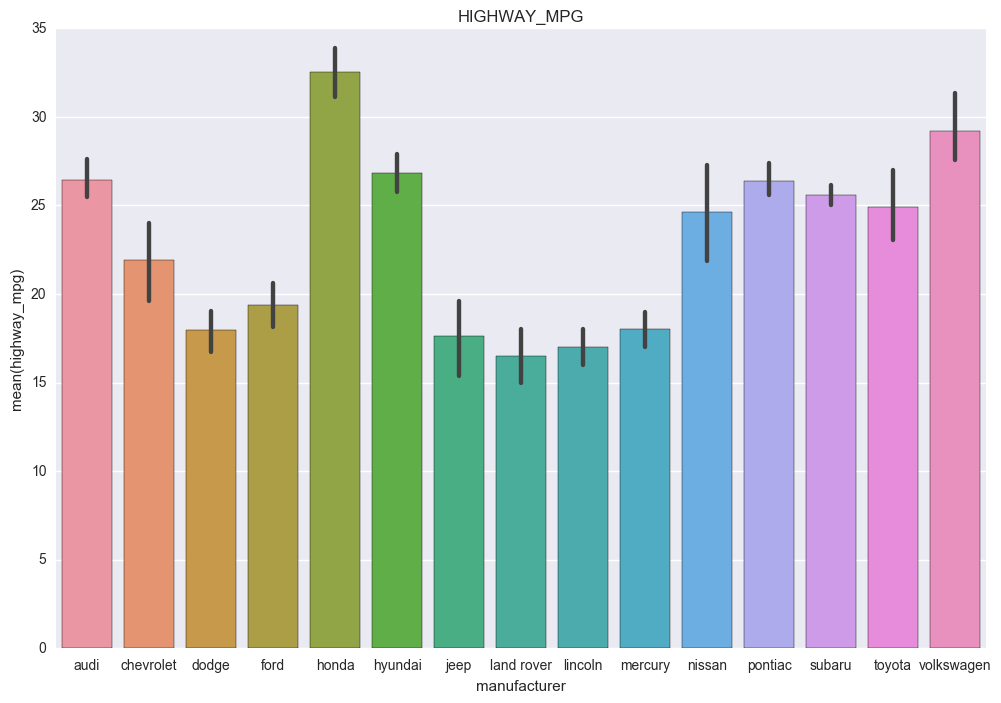

In [8]:
plt.figure(figsize=(12,8))
sns.barplot(x="manufacturer", y="highway_mpg", data=data)
plt.title("HIGHWAY_MPG");

The above graph shows us that honda make the most fuel efficient cars based on highway_mph. The least fuel efficient belongs to the land rover however it is very close to a few other companies. 
city_mpg looks like it should be highly correlated to highway_mpg and thus would provide  similar results. Let's see how correlated they are to each other. 

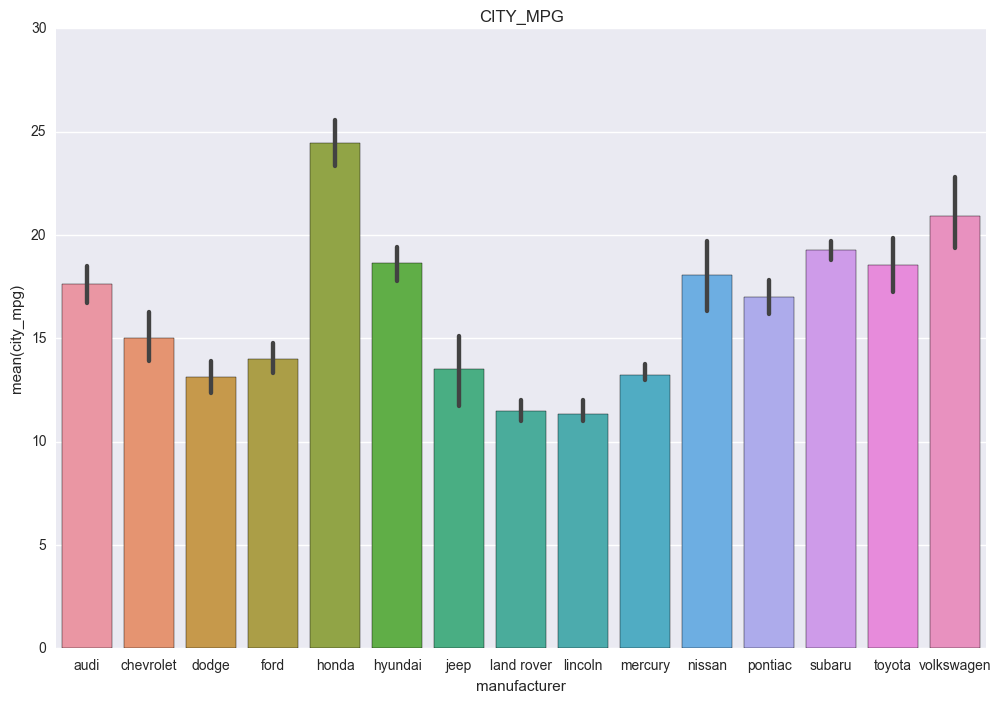

In [9]:
plt.figure(figsize=(12,8))
sns.barplot(x="manufacturer", y="city_mpg", data=data)
plt.title("CITY_MPG");

Looks like we get basically the same results. the minimum changed but, they're very close and the sample size from each of those manufacturers was very small. 

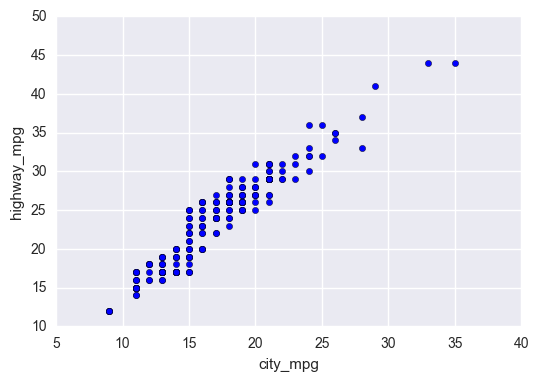

In [10]:
plt.scatter(data['city_mpg'], data['highway_mpg'])
plt.xlabel('city_mpg')
plt.ylabel('highway_mpg')

There is a strong correlation between the two. An increase in fuel efficiency in one category is accompanied by an increase in the other. Let's group them by manufacturer.

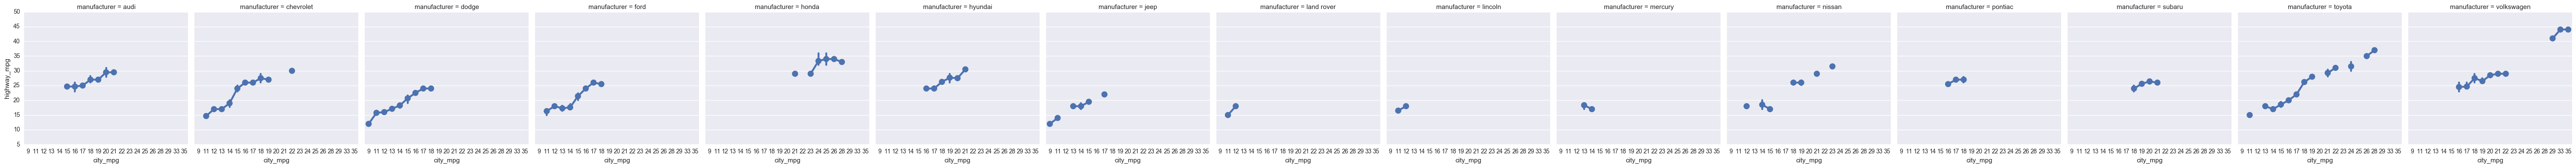

In [11]:
sns.factorplot(data=data, y='highway_mpg', x='city_mpg', col='manufacturer')

The correlation holds for the most part. lets look and see how it changes when seperated by class

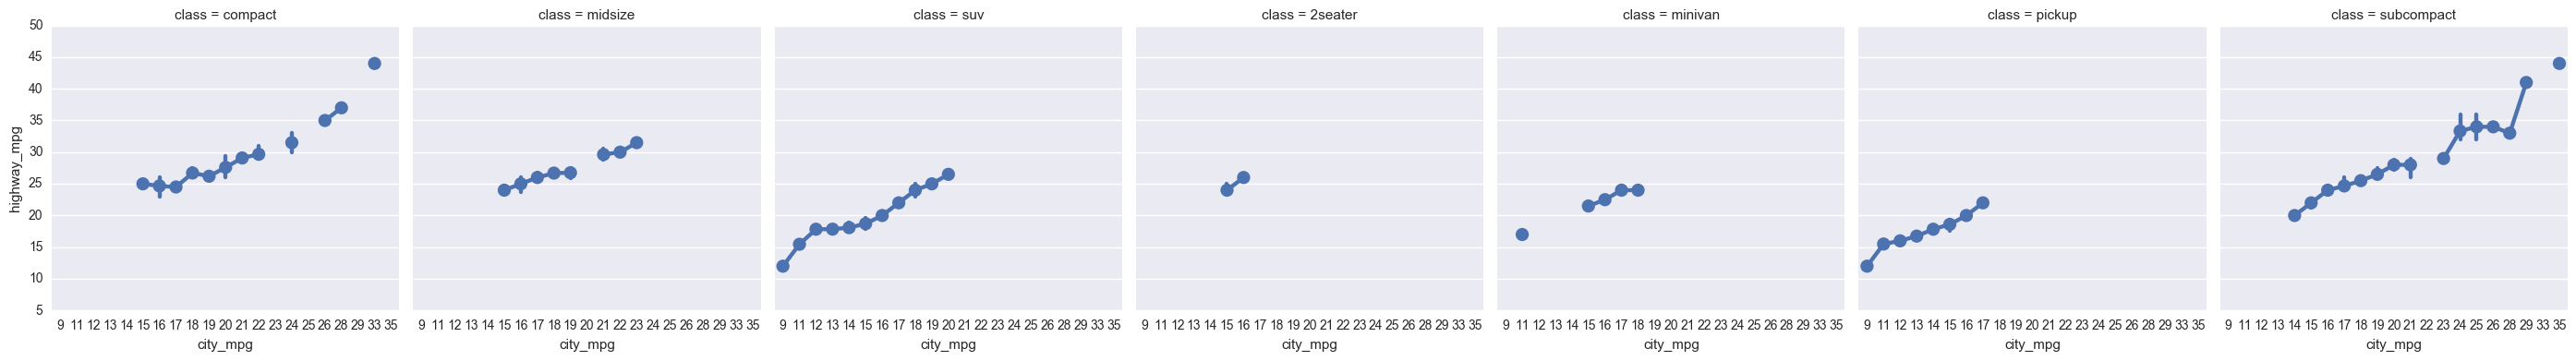

In [12]:
sns.factorplot(data=data, y='highway_mpg', x='city_mpg', col='class')

Distribution by class.

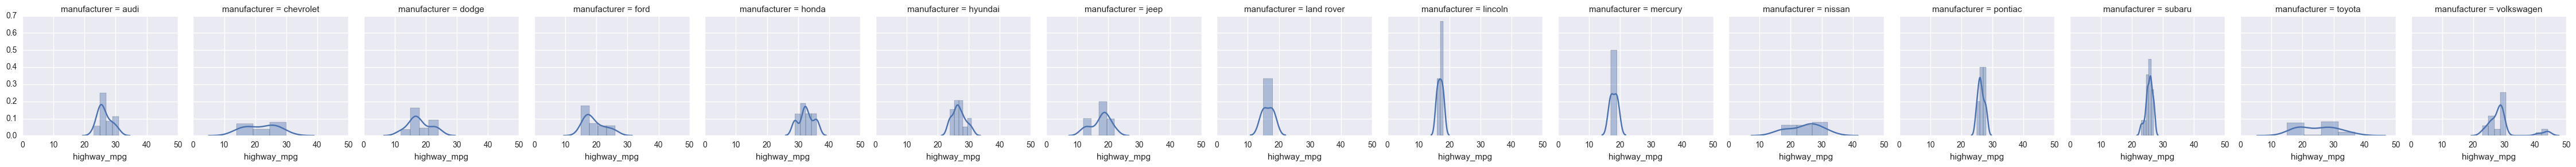

In [13]:
grid = sns.FacetGrid(data, col="manufacturer")
grid.map(sns.distplot,'highway_mpg')

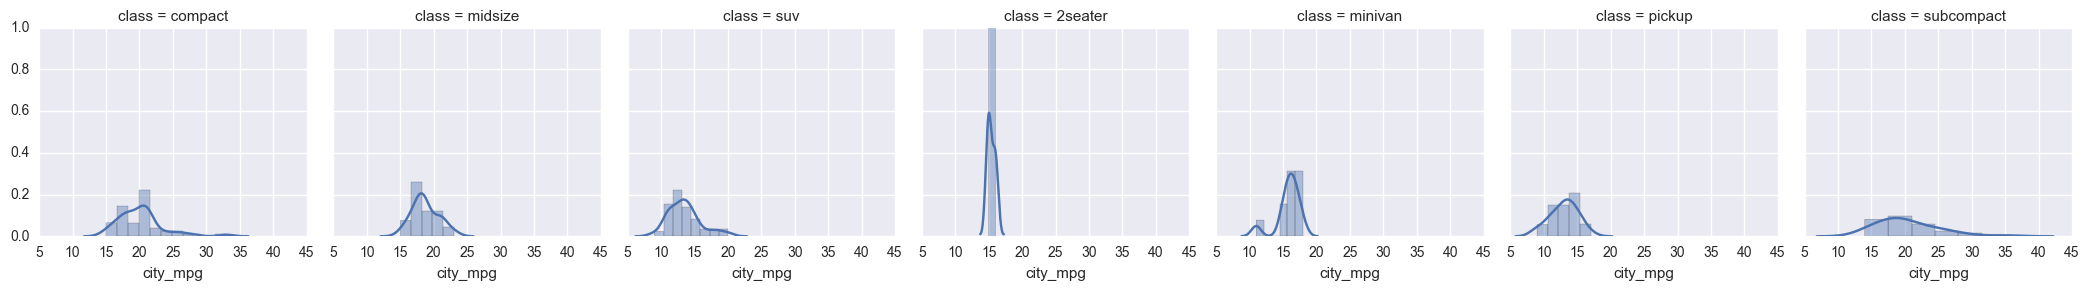

In [14]:
grid = sns.FacetGrid(data, col="class")
grid.map(sns.distplot,'city_mpg')

Resemblance of a normal distribution. Another look at the distribution using boxplots

In [15]:
class_city_mpg = data[['class', 'city_mpg']]

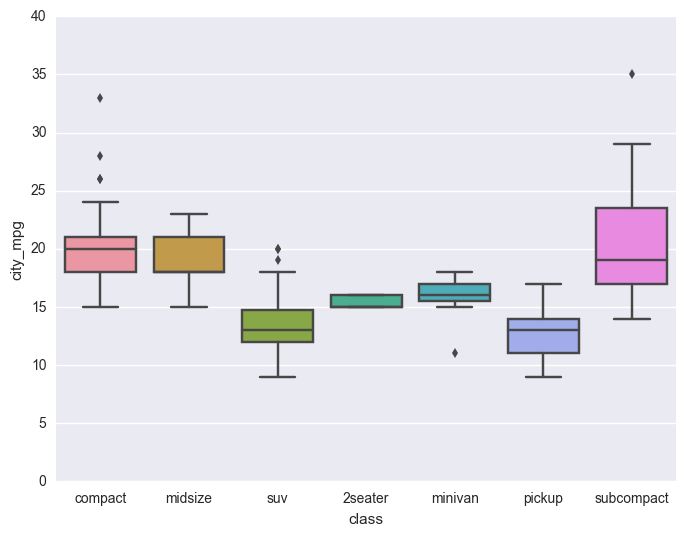

In [16]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='class', y="city_mpg", data=class_city_mpg)
fig.axis(ymin=0, ymax=40);

In [17]:
class_city_mpg['class'].value_counts()

suv           62
compact       47
midsize       41
subcompact    35
pickup        33
minivan       11
2seater        5
Name: class, dtype: int64

Look at the distribution when seperated by cylinder

In [18]:
cylinder_city = data[['cylinder', 'city_mpg']]

In [19]:
cylinder_city['cylinder'].value_counts()

4    81
6    79
8    70
5     4
Name: cylinder, dtype: int64

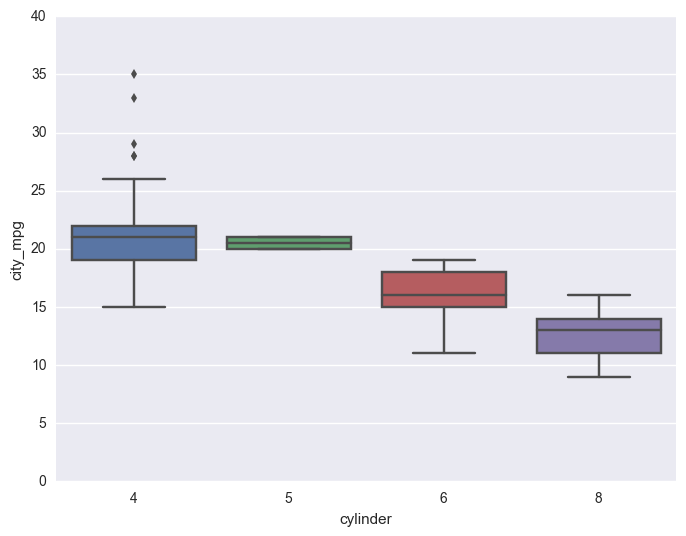

In [20]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='cylinder', y="city_mpg", data=cylinder_city)
fig.axis(ymin=0, ymax=40);

Comparing correlations between columns

In [21]:
data.corr()

,displacement,year,cylinder,city_mpg,highway_mpg
displacement,1.000000,0.147843,0.930227,-0.798524,-0.766020
year,0.147843,1.000000,0.122245,-0.037232,0.002158
cylinder,0.930227,0.122245,1.000000,-0.805771,-0.761912
city_mpg,-0.798524,-0.037232,-0.805771,1.000000,0.955916
highway_mpg,-0.766020,0.002158,-0.761912,0.955916,1.000000


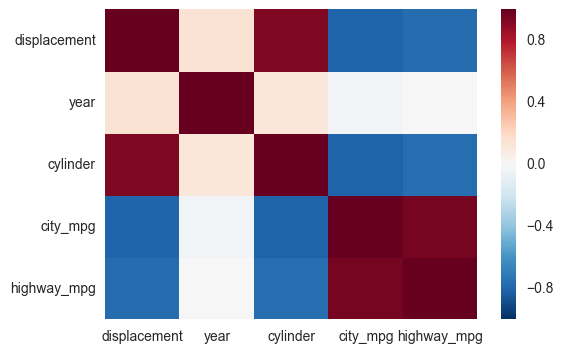

In [22]:
sns.heatmap(data.corr())

As expected we see an extremly high positive correlation between city and highway mpg. There is also a strong negative correlation between mpg and cylinder. The multicollinearity show by the above data may cause inaccuracies if we were to go and build a regression model from the data. 

The data above was missing the object variables. We can use dummy variables to get an idea of the correlation of manufacturer and class with both mpgs.

In [23]:
dummy_df = pd.get_dummies(data, columns=['manufacturer'])

In [24]:
dummy_df.corr()

,displacement,year,cylinder,city_mpg,highway_mpg,manufacturer_audi,manufacturer_chevrolet,manufacturer_dodge,manufacturer_ford,manufacturer_honda,manufacturer_hyundai,manufacturer_jeep,manufacturer_land rover,manufacturer_lincoln,manufacturer_mercury,manufacturer_nissan,manufacturer_pontiac,manufacturer_subaru,manufacturer_toyota,manufacturer_volkswagen
displacement,1.000000,1.478428e-01,0.930227,-0.798524,-0.766020,-2.076512e-01,0.366951,0.304759,0.285498,-0.273145,-0.204132,0.161001,8.471986e-02,0.170447,9.494919e-02,-0.038108,0.055957,-0.198541,-0.165940,-0.340719
year,0.147843,1.000000e+00,0.122245,-0.037232,0.002158,-4.352385e-18,0.078230,0.058565,-0.069171,-0.022222,0.036037,0.094072,-4.066997e-19,-0.037987,-2.033498e-18,0.018657,-0.029553,0.036037,-0.072761,-0.066881
cylinder,0.930227,1.222453e-01,1.000000,-0.805771,-0.761912,-1.196764e-01,0.254050,0.321295,0.281985,-0.234924,-0.161851,0.159248,1.731281e-01,0.149608,9.112005e-02,-0.052852,0.046965,-0.296312,-0.197745,-0.291133
city_mpg,-0.798524,-3.723229e-02,-0.805771,1.000000,0.955916,5.112580e-02,-0.130126,-0.380008,-0.232831,0.357229,0.105963,-0.148810,-1.664109e-01,-0.148276,-1.120686e-01,0.069557,0.004907,0.144148,0.162177,0.345859
highway_mpg,-0.766020,2.157643e-03,-0.761912,0.955916,1.000000,1.459564e-01,-0.077318,-0.400727,-0.237492,0.306817,0.145067,-0.184131,-1.540318e-01,-0.123517,-1.207405e-01,0.047970,0.073605,0.090482,0.102114,0.351441
manufacturer_audi,-0.207651,-4.352385e-18,-0.119676,0.051126,0.145956,1.000000e+00,-0.085816,-0.125106,-0.099840,-0.057735,-0.072822,-0.054313,-3.806935e-02,-0.032898,-3.806935e-02,-0.070014,-0.042656,-0.072822,-0.119024,-0.104257
manufacturer_chevrolet,0.366951,7.823012e-02,0.254050,-0.130126,-0.077318,-8.581574e-02,1.000000,-0.128832,-0.102815,-0.059455,-0.074991,-0.055930,-3.920339e-02,-0.033878,-3.920339e-02,-0.072100,-0.043926,-0.074991,-0.122569,-0.107363
manufacturer_dodge,0.304759,5.856471e-02,0.321295,-0.380008,-0.400727,-1.251057e-01,-0.128832,1.000000,-0.149887,-0.086676,-0.109325,-0.081538,-5.715232e-02,-0.049388,-5.715232e-02,-0.105110,-0.064038,-0.109325,-0.178687,-0.156518
manufacturer_ford,0.285498,-6.917145e-02,0.281985,-0.232831,-0.237492,-9.984038e-02,-0.102815,-0.149887,1.000000,-0.069171,-0.087247,-0.065071,-4.561030e-02,-0.039414,-4.561030e-02,-0.083883,-0.051105,-0.087247,-0.142601,-0.124909
manufacturer_honda,-0.273145,-2.222222e-02,-0.234924,0.357229,0.306817,-5.773503e-02,-0.059455,-0.086676,-0.069171,1.000000,-0.050452,-0.037629,-2.637522e-02,-0.022792,-2.637522e-02,-0.048507,-0.029553,-0.050452,-0.082462,-0.072232


In [25]:
class_dummy = pd.get_dummies(data, columns=['class'])

In [26]:
class_dummy.corr()

,displacement,year,cylinder,city_mpg,highway_mpg,class_2seater,class_compact,class_midsize,class_minivan,class_pickup,class_subcompact,class_suv
displacement,1.000000,0.147843,0.930227,-0.798524,-0.766020,0.308114,-0.445752,-0.196577,-0.013935,0.297447,-0.264080,0.458562
year,0.147843,1.000000,0.122245,-0.037232,0.002158,0.029553,-0.032000,0.011242,-0.020191,0.012278,-0.035947,0.038735
cylinder,0.930227,0.122245,1.000000,-0.805771,-0.761912,0.193985,-0.403149,-0.163893,-0.009766,0.287602,-0.224366,0.402795
city_mpg,-0.798524,-0.037232,-0.805771,1.000000,0.955916,-0.050763,0.385865,0.205894,-0.054430,-0.368184,0.346858,-0.474867
highway_mpg,-0.766020,0.002158,-0.761912,0.955916,1.000000,0.033816,0.409858,0.298835,-0.040239,-0.447434,0.331916,-0.536653
class_2seater,0.308114,0.029553,0.193985,-0.050763,0.033816,1.000000,-0.074079,-0.068105,-0.032818,-0.059872,-0.061969,-0.088715
class_compact,-0.445752,-0.032000,-0.403149,0.385865,0.409858,-0.074079,1.000000,-0.231069,-0.111345,-0.203136,-0.210250,-0.300995
class_midsize,-0.196577,0.011242,-0.163893,0.205894,0.298835,-0.068105,-0.231069,1.000000,-0.102366,-0.186755,-0.193295,-0.276723
class_minivan,-0.013935,-0.020191,-0.009766,-0.054430,-0.040239,-0.032818,-0.111345,-0.102366,1.000000,-0.089992,-0.093143,-0.133345
class_pickup,0.297447,0.012278,0.287602,-0.368184,-0.447434,-0.059872,-0.203136,-0.186755,-0.089992,1.000000,-0.169929,-0.243271


class seems to be the better indicator of correlation. Class may be a better predicter of mpg over manufacturer. 